In [1]:
!pwd

/content


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [3]:
! pip install -q kaggle

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600  ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d nbroad/fluorescent-neuronal-cells

 99% 390M/395M [00:06<00:00, 32.3MB/s]
100% 395M/395M [00:06<00:00, 62.3MB/s]


In [8]:
!unzip fluorescent-neuronal-cells.zip

Archive:  fluorescent-neuronal-cells.zip
  inflating: README.md               
  inflating: all_images/LICENSE.txt  
  inflating: all_images/images/37_y.png  
  inflating: all_images/images/38_y.png  
  inflating: all_images/images/39_y.png  
  inflating: all_images/images/MAR38S1C3R1_DML_20_o.png  
  inflating: all_images/images/MAR38S1C3R1_DMR_20_o.png  
  inflating: all_images/images/MAR38S1C3R1_LHR_20_o.png  
  inflating: all_images/images/MAR39S2C2R2_DML_200x_o.png  
  inflating: all_images/images/MAR39S2C2R2_DMR_200x_o.png  
  inflating: all_images/images/MAR52S2C1R3_LHL_20_o.png  
  inflating: all_images/images/MAR55S1C5R3_DMR_20_o.png  
  inflating: all_images/images/MAR55S3C2R2_VLPAGL_20_o.png  
  inflating: all_images/images/MAR55S3C2R2_VLPAGR_20_o.png  
  inflating: all_images/images/Mar19bS1C1R2_VLPAGr_200x_y.png  
  inflating: all_images/images/Mar19bS1C1R3_VLPAGl_200x_y.png  
  inflating: all_images/images/Mar19bS1C1R3_VLPAGr_200x_y.png  
  inflating: all_images/images/Ma

In [9]:
#path
from pathlib import Path
#OS command or directory
import os
# data pre processing
import pandas as pd
# data preprocessing
from sklearn.model_selection import train_test_split
# data visualization
import matplotlib.pyplot as plt
# Ml / DL Library
import tensorflow as tf
# keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
import numpy as np

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
img_path = Path(r'/content/all_images')

In [12]:
mask_path = Path(r'/content/all_masks')

In [13]:
img_path = list(img_path.glob(r'**/*.png'))

In [14]:
mask_path = list(mask_path.glob(r'**/*.png'))

In [15]:
img_path = pd.Series(img_path).astype(str)

In [16]:
mask_path = pd.Series(mask_path).astype(str)

In [17]:
X=pd.DataFrame(img_path)
Y=pd.DataFrame(mask_path)

In [ ]:

df = pd.concat([img_path, mask_path], axis=1)

In [ ]:
df.columns=['Images','Masks']

In [18]:
X.columns=['Images']

In [19]:
Y.columns=['Masks']

In [20]:
X.head()

,Images
0,/content/all_images/images/MAR55S3C2R2_VLPAGL_...
1,/content/all_images/images/Mar19bS1C3R1_VLPAGl...
2,/content/all_images/images/Mar24bS1C1R1_DMr_20...
3,/content/all_images/images/Mar19bS1C5R3_LHr_20...
4,/content/all_images/images/Mar20bS1C1R3_VLPAGl...


In [21]:
Y.head()

,Masks
0,/content/all_masks/masks/MAR55S3C2R2_VLPAGL_20...
1,/content/all_masks/masks/Mar19bS1C3R1_VLPAGl_2...
2,/content/all_masks/masks/Mar24bS1C1R1_DMr_200x...
3,/content/all_masks/masks/Mar19bS1C5R3_LHr_200x...
4,/content/all_masks/masks/Mar20bS1C1R3_VLPAGl_2...


In [ ]:
#df.columns=['Image','Mask']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=30)

In [ ]:
#x_train,x_test,y_train,y_test

In [ ]:
x_train,x_test = train_test_split(df,test_size=0.2,random_state=30)

In [23]:
x_train

,Images
271,/content/all_images/images/Mar21bS1C1R3_VLPAGl...
232,/content/all_images/images/Mar21bS2C1R2_LHl_20...
138,/content/all_images/images/Mar23bS1C2R2_VLPAGr...
180,/content/all_images/images/Mar20bS1C3R1_VLPAGl...
192,/content/all_images/images/Mar21bS2C1R3_DMr_20...
...,...
263,/content/all_images/images/Mar24bS2C4R3_LHr_20...
131,/content/all_images/images/Mar26bS2C1R2_LHr_20...
145,/content/all_images/images/Mar23bS1C5R2_LHl_20...
251,/content/all_images/images/Mar20bS1C3R2_VLPAGr...


In [24]:
print("Shape of training data", x_train.shape)
print("Shape of test data", x_test.shape)

Shape of training data (226, 1)
Shape of test data (57, 1)


In [249]:
'''image_data_generator = ImageDataGenerator(
    rescale=1./255
)
#for i in range(0,len(x_train)):
train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='Images', target_size=(200,200), color_mode='rgb', class_mode='binary', shuffle=False)
'''

"image_data_generator = ImageDataGenerator(\n    rescale=1./255\n)\n#for i in range(0,len(x_train)):\ntrain = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='Images', target_size=(200,200), color_mode='rgb', class_mode='binary', shuffle=False)\n"

In [31]:
imread(x_train.iloc[0][0])

array([[[ 8,  5,  0],
        [ 7,  4,  0],
        [ 9,  4,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 9,  5,  0],
        [ 7,  2,  0],
        [ 9,  3,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 9,  4,  0],
        [10,  4,  0],
        [10,  3,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 7,  1,  0],
        [ 6,  1,  0],
        [ 4,  1,  0],
        ...,
        [ 3,  0,  0],
        [ 3,  0,  0],
        [ 1,  0,  0]],

       [[ 7,  0,  0],
        [ 7,  2,  0],
        [ 6,  2,  0],
        ...,
        [ 3,  0,  0],
        [ 3,  0,  0],
        [ 1,  0,  0]],

       [[ 6,  0,  0],
        [ 6,  1,  0],
        [ 6,  2,  0],
        ...,
        [ 3,  0,  0],
        [ 3,  0,  0],
        [ 2,  0,  0]]], dtype=uint8)

In [30]:
import cv2
from skimage.io import imread, imshow

In [ ]:
#x=np.array(x_train.iloc[0])

In [ ]:
#x

array(['/content/all_images/images/Mar21bS1C1R3_VLPAGl_200x_y.png'],
      dtype=object)

In [ ]:
#x=x.astype(str)

In [ ]:
#x

array(['/content/all_images/images/Mar21bS1C1R3_VLPAGl_200x_y.png'],
      dtype='<U57')

In [51]:
#imread(x[0])

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


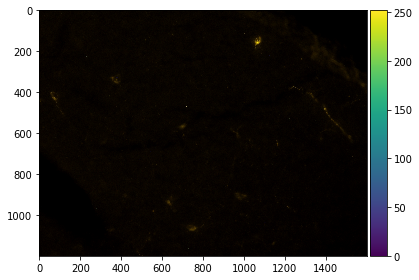

In [ ]:
imshow(x[0])

In [45]:
x=np.array(x_train.iloc[:])
y=np.array(y_train.iloc[:])


In [93]:
xt=np.array(x_test.iloc[:])
yt=np.array(y_test.iloc[:])

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


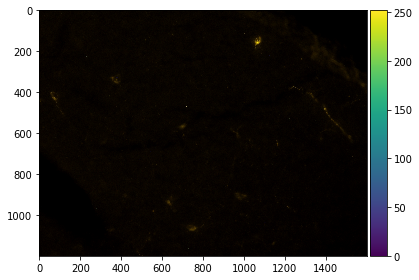

In [46]:
display1=imread(x[0][0])
imshow(display1)

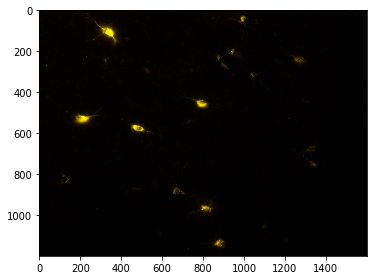

In [47]:

display2=imread(x[1][0])
imshow(display2)

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


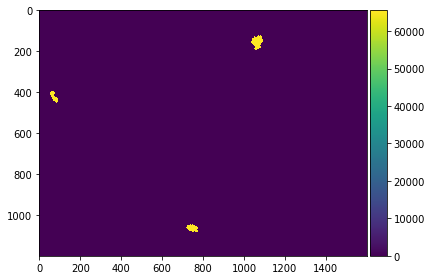

In [48]:
display3=imread(y[0][0])
imshow(display3)


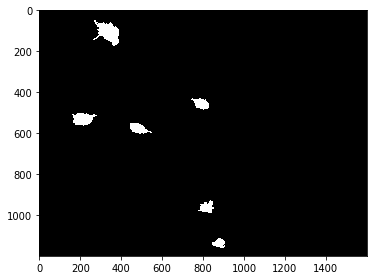

In [50]:
display4=imread(y[1][0])
imshow(display4)

In [ ]:
#print(imread(x[0]))

[[[ 8  5  0]
  [ 7  4  0]
  [ 9  4  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 9  5  0]
  [ 7  2  0]
  [ 9  3  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 9  4  0]
  [10  4  0]
  [10  3  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 7  1  0]
  [ 6  1  0]
  [ 4  1  0]
  ...
  [ 3  0  0]
  [ 3  0  0]
  [ 1  0  0]]

 [[ 7  0  0]
  [ 7  2  0]
  [ 6  2  0]
  ...
  [ 3  0  0]
  [ 3  0  0]
  [ 1  0  0]]

 [[ 6  0  0]
  [ 6  1  0]
  [ 6  2  0]
  ...
  [ 3  0  0]
  [ 3  0  0]
  [ 2  0  0]]]


In [ ]:
#print(imread(x[i]))

In [333]:
IMG_HEIGHT=256
IMG_WIDTH=256
IMG_CHANNELS=3

In [334]:
x_norm = np.zeros((len(x_train), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
#x_norm=np.zeros(x.shape)

In [335]:
x_norm.shape

(226, 256, 256, 3)

In [336]:
from skimage.transform import resize

In [337]:
x.shape

(226, 1)

In [338]:
for i in range(0,len(x_train)):
  temp=(imread(x[i][0]))[:,:,:IMG_CHANNELS]
  temp = resize(temp, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
  x_norm[i] = temp

In [339]:
x_norm.shape

(226, 256, 256, 3)

In [340]:
y_norm = np.zeros((len(y_train), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)
x_test_norm=np.zeros((len(x_test), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
y_test_norm=np.zeros((len(y_test), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)

In [341]:
y.shape

(226, 1)

In [342]:
y_norm.shape

(226, 256, 256, 1)

In [343]:
y_norm.squeeze

<function ndarray.squeeze>

In [344]:
y_norm.shape

(226, 256, 256, 1)

In [345]:
for i in range(0,len(y_train)):
  temp=(imread(y[i][0]))
  temp = np.expand_dims(resize(temp, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                      preserve_range=True), axis=-1)
  y_norm[i] = temp

In [346]:
for i in range(0,len(x_test)):
  temp=(imread(xt[i][0]))[:,:,:IMG_CHANNELS]
  temp = resize(temp, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
  x_test_norm[i] = temp

In [347]:
for i in range(0,len(y_test)):
  temp=(imread(yt[i][0]))
  temp = np.expand_dims(resize(temp, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                      preserve_range=True), axis=-1)
  y_test_norm[i] = temp

In [348]:
y_norm.shape

(226, 256, 256, 1)

Normalizing the Array

In [349]:
x_norm  = np.array(x_norm, np.float32)/255.
y_norm  = np.array(y_norm, np.float32)/255.
x_test_norm  = np.array(x_test_norm, np.float32)/255.
y_test_norm  = np.array(y_test_norm, np.float32)/255.

In [350]:
print(x_norm)

[[[[0.02352941 0.00784314 0.        ]
   [0.02352941 0.01176471 0.        ]
   [0.02352941 0.00784314 0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.03529412 0.01176471 0.        ]
   [0.03529412 0.01176471 0.        ]
   [0.02745098 0.01176471 0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.03137255 0.01176471 0.        ]
   [0.03137255 0.01176471 0.        ]
   [0.03137255 0.01176471 0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.01176471 0.         0.        ]
   [0.01568628 0.         0.        ]
   [0.01960784 0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.00784314 0.         0.        ]]

  [[0.01568628 0.         0.        ]
   [0.0

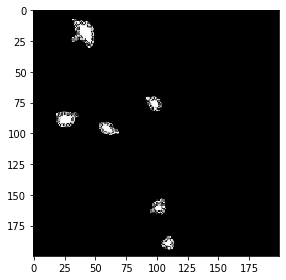

In [247]:
imshow(np.squeeze(y_norm[1,:,:,:]))

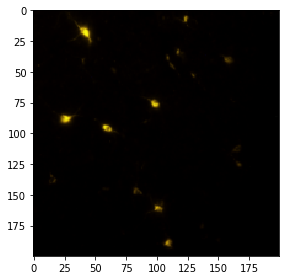

In [248]:
imshow(x_norm[1,:,:,:])

**Model Building of U-net**

In [267]:
'''inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
'''

In [272]:
'''#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)'''

"#Expansive path \nu6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)\nu6 = tf.keras.layers.concatenate([u6, c4])\nc6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)\nc6 = tf.keras.layers.Dropout(0.2)(c6)\nc6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)\n \nu7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)\nu7 = tf.keras.layers.concatenate([u7, c3])\nc7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)\nc7 = tf.keras.layers.Dropout(0.2)(c7)\nc7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)\n \nu8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)\nu8 = tf.keras.layers.concatenate([u8, c2])\nc8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu

In [273]:
'''model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()'''

"model = tf.keras.Model(inputs=[inputs], outputs=[outputs])\nmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])\nmodel.summary()"

In [351]:
from tensorflow.keras import layers


def get_model():
    inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    #x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        #x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        #x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        #x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        #x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
model = get_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 activation (Activation)        (None, 128, 128, 32  0           ['conv2d[0][0]']                 
                                )                                                             

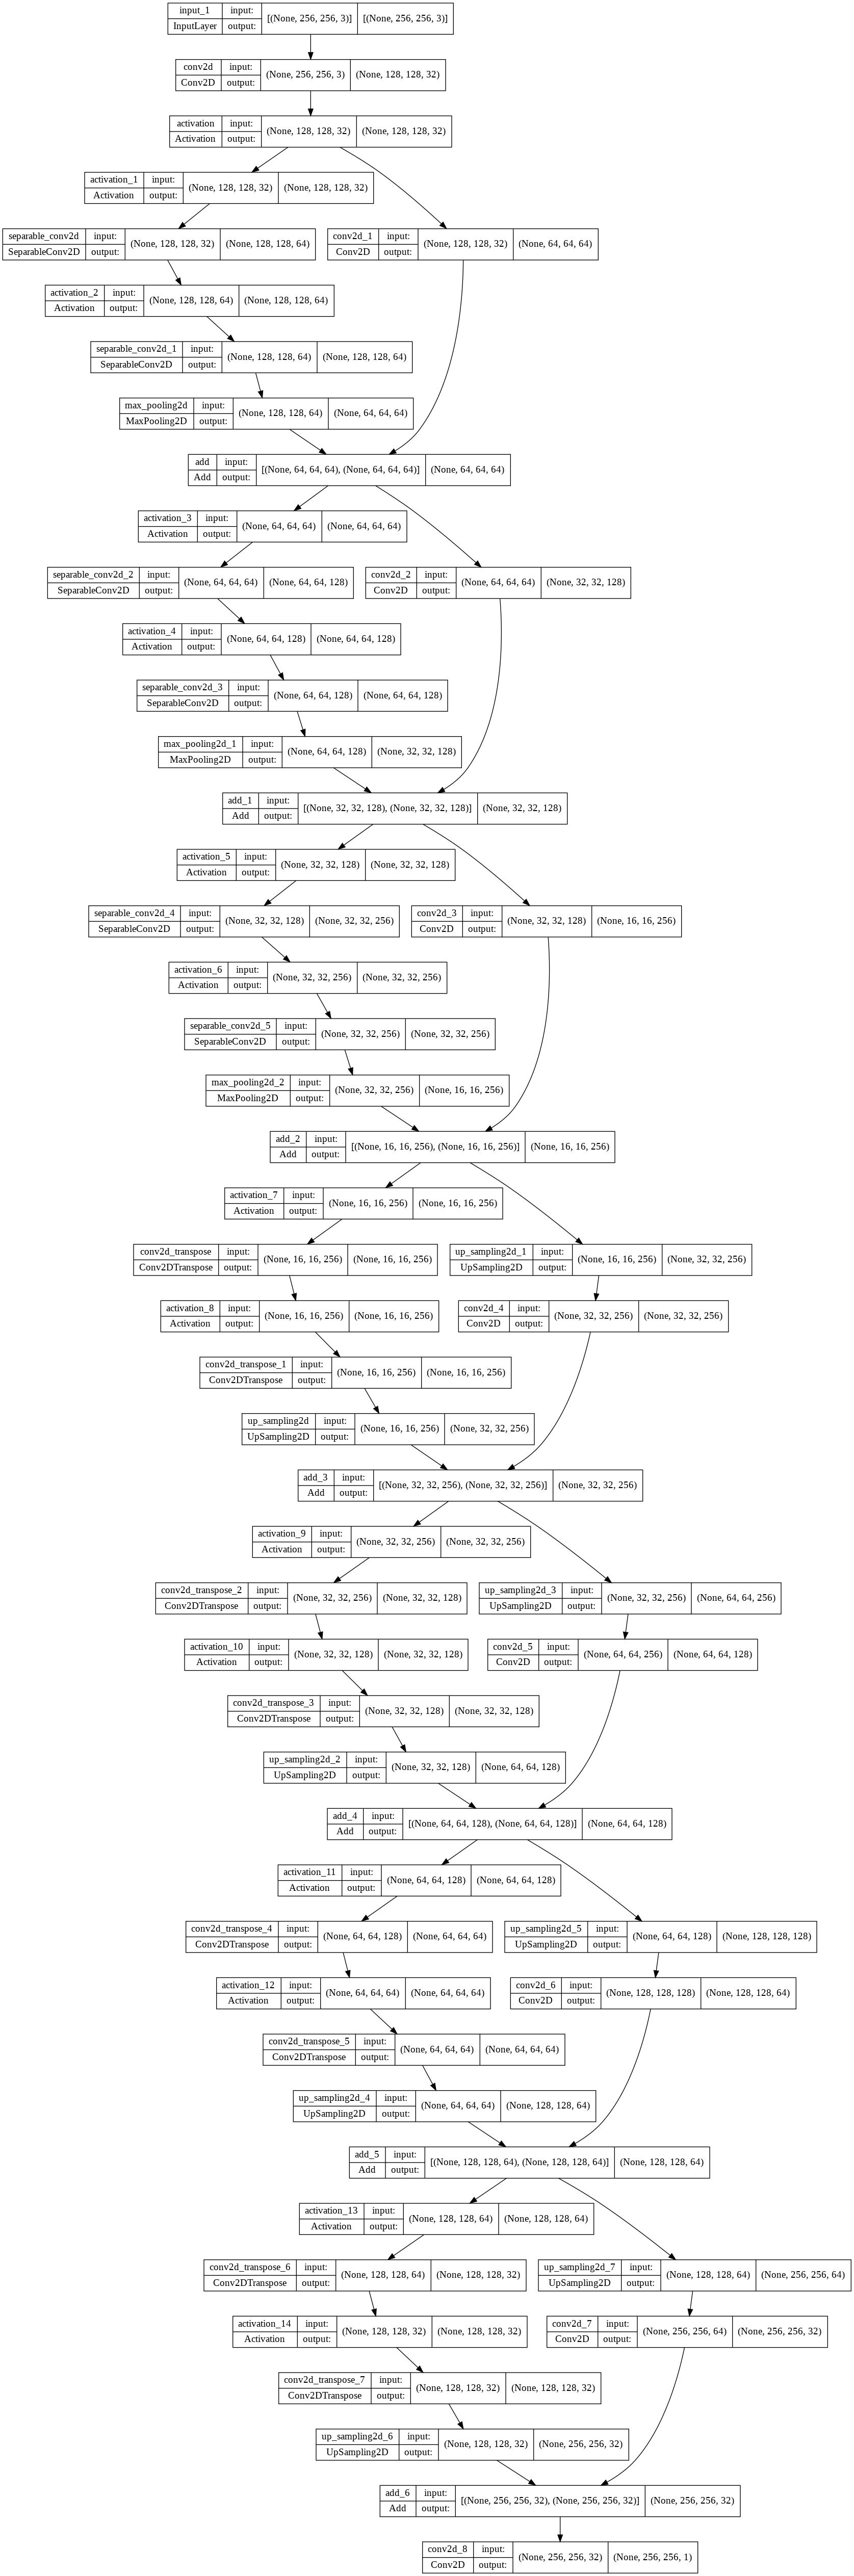

In [352]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [353]:
callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)]

In [354]:
results = model.fit(x_norm, y_norm, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

Epoch 1/25
13/13 [==============================] - ETA: 0s - loss: 0.1727 - accuracy: 0.9858
Epoch 1: val_loss improved from inf to 0.03429, saving model to model_for_nuclei.h5
13/13 [==============================] - 98s 7s/step - loss: 0.1727 - accuracy: 0.9858 - val_loss: 0.0343 - val_accuracy: 0.9927
Epoch 2/25
13/13 [==============================] - ETA: 0s - loss: 0.0522 - accuracy: 0.9866
Epoch 2: val_loss improved from 0.03429 to 0.02766, saving model to model_for_nuclei.h5
13/13 [==============================] - 95s 7s/step - loss: 0.0522 - accuracy: 0.9866 - val_loss: 0.0277 - val_accuracy: 0.9927
Epoch 3/25
13/13 [==============================] - ETA: 0s - loss: 0.0393 - accuracy: 0.9866
Epoch 3: val_loss improved from 0.02766 to 0.02557, saving model to model_for_nuclei.h5
13/13 [==============================] - 95s 7s/step - loss: 0.0393 - accuracy: 0.9866 - val_loss: 0.0256 - val_accuracy: 0.9927
Epoch 4/25
13/13 [==============================] - ETA: 0s - loss: 0.0

In [305]:
import random

2/2 [==============================] - 8s 3s/step


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


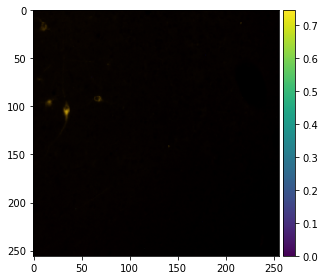

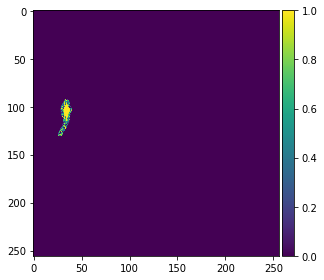

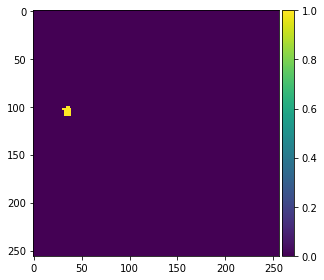

In [355]:
idx = random.randint(0, len(x_norm))


preds_train = model.predict(x_norm[:int(x_norm.shape[0]*0.9)], verbose=1)
preds_val = model.predict(x_norm[int(x_norm.shape[0]*0.9):], verbose=1)
preds_test = model.predict(x_test_norm, verbose=1)

 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(x_norm[ix])
plt.show()
imshow(np.squeeze(y_norm[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

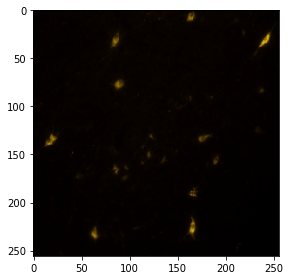

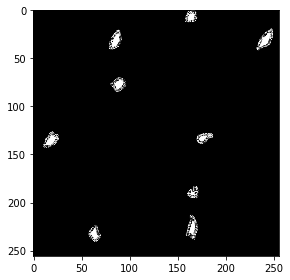

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


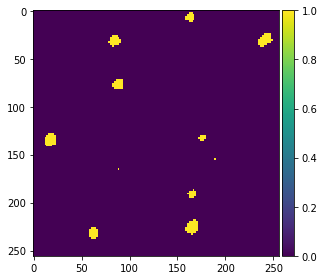

In [357]:
ix = random.randint(0, len(preds_test_t))
imshow(x_test_norm[ix])
plt.show()
imshow(np.squeeze(y_test_norm[ix]))
plt.show()
imshow(np.squeeze(preds_test_t[ix]))
plt.show()

array(['/content/all_images/images/Mar21bS1C1R3_VLPAGl_200x_y.png',
       '/content/all_images/images/Mar21bS2C1R2_LHl_200x_y.png',
       '/content/all_images/images/Mar23bS1C2R2_VLPAGr_200x_y.png',
       '/content/all_images/images/Mar20bS1C3R1_VLPAGl_200x_y.png',
       '/content/all_images/images/Mar21bS2C1R3_DMr_200x_y.png',
       '/content/all_images/images/Mar26bS2C2R2_DMl_200x_y.png',
       '/content/all_images/images/Mar23bS1C6R1_LHr_200x_y.png',
       '/content/all_images/images/Mar20bS2C3R1_LHl_200x_y.png',
       '/content/all_images/images/Mar19bS1C5R1_DMl_200x_y.png',
       '/content/all_images/images/Mar24bS1C1R2_DMr_200x_y.png',
       '/content/all_images/images/Mar23bS1C5R2_LHr_200x_y.png',
       '/content/all_images/images/Mar20bS1C4R3_DMl_200x_y.png',
       '/content/all_images/images/Mar23bS1C6R2_DMr_200x_y.png',
       '/content/all_images/images/Mar24bS1C2R2_DMr_200x_y.png',
       '/content/all_images/images/Mar21bS2C1R1_LHr_200x_y.png',
       '/content